## Time Series Pred: Milk production data
https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line

** Dataset Information: **

Monthly milk production during Jan 62 - Dec 75

** Attribute Information: **

- Month 
- milk production (pounds per cow). Jan 62 - Dec 75

** Objective of this project **

predict the last 12 months milk production based on the data during the previous period

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Load Data
df = pd.read_csv('monthly-milk-production.csv',index_col='Month')
df.head()

,Milk Production
Month,
1/1/1962,589
2/1/1962,561
3/1/1962,640
4/1/1962,656
5/1/1962,727


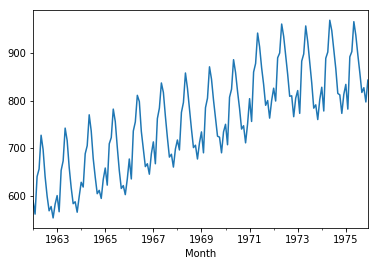

In [3]:
df.index = pd.to_datetime(df.index)
df.plot(legend=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
Milk Production    168 non-null int64
dtypes: int64(1)
memory usage: 2.6 KB


## LSTM

#### Data preprocessing

In [6]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import mean_squared_error

# load train test set
df = pd.read_csv('monthly-milk-production.csv',index_col='Month')
train_set = df.head(156)
test_set = df.tail(12)
#print(train_set.shape, test_set.shape)

# scale features
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set = sc.fit_transform(train_set)
#print(train_set.min(), train_set.max())

# create train set 
num_train = 156
X_train = train_set[0:num_train-1]
y_train = train_set[1:num_train]

# reshape to (#inputs, #steps, input dim)
X_train = np.reshape(X_train, (num_train-1, 1, 1))
#print(X_train.shape, y_train.shape)

# create test set
num_test = 12
inputs = test_set.values
X_test = sc.transform(inputs).reshape(num_test,1,1)
#print(X_test.shape)

#### Model Train

In [7]:
seed = 101
np.random.seed(seed)
K.clear_session()
# create the model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, 
               input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(model.summary())
# train the model
model.fit(X_train, y_train, epochs = 200, batch_size = 32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
155/155 [==============================] - 2s 10ms/step - loss: 0.2680
Epoch 2/200
155/155 [=============================

155/155 [==============================] - 0s 206us/step - loss: 0.0139
Epoch 86/200
155/155 [==============================] - 0s 181us/step - loss: 0.0126
Epoch 87/200
155/155 [==============================] - 0s 155us/step - loss: 0.0148
Epoch 88/200
155/155 [==============================] - 0s 181us/step - loss: 0.0123
Epoch 89/200
155/155 [==============================] - 0s 155us/step - loss: 0.0142
Epoch 90/200
155/155 [==============================] - 0s 206us/step - loss: 0.0131
Epoch 91/200
155/155 [==============================] - 0s 232us/step - loss: 0.0134
Epoch 92/200
155/155 [==============================] - 0s 181us/step - loss: 0.0134
Epoch 93/200
155/155 [==============================] - 0s 232us/step - loss: 0.0136
Epoch 94/200
155/155 [==============================] - 0s 232us/step - loss: 0.0121
Epoch 95/200
155/155 [==============================] - 0s 258us/step - loss: 0.0135
Epoch 96/200
155/155 [==============================] - 0s 155us/step - loss: 

155/155 [==============================] - 0s 155us/step - loss: 0.0122
Epoch 181/200
155/155 [==============================] - 0s 155us/step - loss: 0.0125
Epoch 182/200
155/155 [==============================] - 0s 155us/step - loss: 0.0118
Epoch 183/200
155/155 [==============================] - 0s 206us/step - loss: 0.0142
Epoch 184/200
155/155 [==============================] - 0s 155us/step - loss: 0.0128
Epoch 185/200
155/155 [==============================] - 0s 155us/step - loss: 0.0121
Epoch 186/200
155/155 [==============================] - 0s 181us/step - loss: 0.0122
Epoch 187/200
155/155 [==============================] - 0s 181us/step - loss: 0.0133
Epoch 188/200
155/155 [==============================] - 0s 206us/step - loss: 0.0134
Epoch 189/200
155/155 [==============================] - 0s 206us/step - loss: 0.0123
Epoch 190/200
155/155 [==============================] - 0s 181us/step - loss: 0.0112
Epoch 191/200
155/155 [==============================] - 0s 232us/st

#### Model Evaluation

Test set, RMSE:  6.82485189287


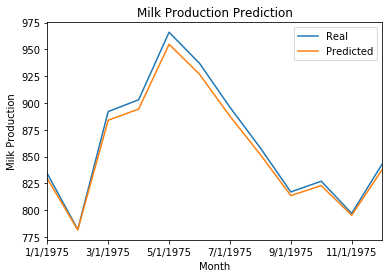

In [10]:
# make predictions
y_pred = sc.inverse_transform(model.predict(X_test))
# calculate rmse
rmse = np.sqrt(mean_squared_error(test_set.iloc[:,0], y_pred))
print('Test set, RMSE: ', rmse)

# visulaize the results
test_set['Prediction'] = y_pred
test_set.plot()
plt.ylabel('Milk Production')
plt.title('Milk Production Prediction')
plt.legend(['Real','Predicted'])

## LSTM with 60 timesteps

#### Data Preprocessing

In [18]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import mean_squared_error

# load train test set
df = pd.read_csv('monthly-milk-production.csv',index_col='Month')
train_set = df.head(156)
test_set = df.tail(12)
full_set = df
#print(train_set.shape, test_set.shape, full_set.shape)

# scale feature
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set = sc.fit_transform(train_set)
#print(train_set.min(), train_set.max())

# create train set with 60 timesteps and 1 output
num_train = 156
num_steps = 60
X_train = []
y_train = []
for i in range(num_steps , num_train):
    X_train.append(train_set[i-num_steps:i, 0])
    y_train.append(train_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
#print(X_train.shape,y_train.shape)

# reshape to (#inputs, #steps, input dim)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print(X_train.shape,y_train.shape)

# plot some train set
#for i in range(0,X_train.shape[1],15):
#    plt.plot(range(X_train.shape[0]),X_train[:,i], label=i)
#plt.legend()

# create test set
inputs = full_set[len(full_set) - len(test_set) - num_steps:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(num_steps, num_steps+len(test_set)):
    X_test.append(inputs[i-num_steps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#print(X_test.shape)

#### Model Train

In [21]:
seed = 128
np.random.seed(seed)
K.clear_session()

# creat the model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, 
               input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(model.summary())
# train the model
model.fit(X_train, y_train, epochs = 300, batch_size = 32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

96/96 [==============================] - 1s 6ms/step - loss: 0.0265
Epoch 84/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0261
Epoch 85/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0257
Epoch 86/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0238
Epoch 87/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0289
Epoch 88/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0250
Epoch 89/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0286
Epoch 90/300
96/96 [==============================] - 1s 5ms/step - loss: 0.0237
Epoch 91/300
96/96 [==============================] - 1s 5ms/step - loss: 0.0257
Epoch 92/300
96/96 [==============================] - 1s 6ms/step - loss: 0.0249
Epoch 93/300
96/96 [==============================] - 1s 6ms/step - loss: 0.0239
Epoch 94/300
96/96 [==============================] - 1s 6ms/step - loss: 0.0274
Epoch 95/300
96/96 [=====================

96/96 [==============================] - 1s 8ms/step - loss: 0.0105
Epoch 184/300
96/96 [==============================] - 1s 7ms/step - loss: 0.0080
Epoch 185/300
96/96 [==============================] - 1s 7ms/step - loss: 0.0075
Epoch 186/300
96/96 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 187/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 188/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 189/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 190/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 191/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 192/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0097
Epoch 193/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0098
Epoch 194/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 195/300
96/96 [=========

96/96 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 284/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 285/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 286/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 287/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 288/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 289/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 290/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 291/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 292/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 293/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 294/300
96/96 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 295/300
96/96 [=========

#### Model Evaluation

Test set, RMSE:  31.0289764421


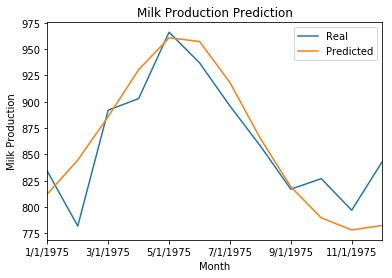

In [22]:
# make predictions
y_pred = sc.inverse_transform(model.predict(X_test))
# calculate rmse
rmse = np.sqrt(mean_squared_error(test_set.iloc[:,0], y_pred))
print('Test set, RMSE: ', rmse)

# visulaize the results
test_set['Prediction'] = y_pred
test_set.plot()
plt.ylabel('Milk Production')
plt.title('Milk Production Prediction')
plt.legend(['Real','Predicted'])